# Research Question: 

## Are Citi Bike users under 35 years of age significantly more likely to bike for longer durations compared to the average user?

*Null Hypothesis:* The mean trip duration of Citi Bike users under the age of 35 is the same or less than the mean trip duration of an average user, significance level = 0.05.

*Alternative Hypothesis:* The mean trip duration of Citi Bike users under the age of 35 is more than the mean trip duration of an average user, significance level = 0.05

## Equations:
- H0: mean Trip Duration(under 35) =< mean Trip Duration(total pop)
- Ha: mean Trip Duration(under 35) > mean Trip Duration(total pop)


In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

In [3]:
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [4]:
import os
import json

In [5]:
os.getenv('PUI2016')

'/home/cusp/jc7344/PUI2016'

In [6]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [7]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  28.5M      0 --:--:-- --:--:-- --:--:-- 48.8M


In [8]:
!unzip 201512-citibike-tripdata.zip

Archive:  201512-citibike-tripdata.zip
  inflating: 201512-citibike-tripdata.csv  


In [13]:
CitiBike = pd.read_csv('201512-citibike-tripdata.csv')
CitiBike.head

<bound method DataFrame.head of         tripduration            starttime             stoptime  \
0                475   12/1/2015 07:35:36   12/1/2015 07:43:32   
1                684   12/1/2015 07:38:15   12/1/2015 07:49:39   
2               1063   12/1/2015 07:44:49   12/1/2015 08:02:33   
3               1075   12/1/2015 08:02:29   12/1/2015 08:20:24   
4                293   12/1/2015 08:06:37   12/1/2015 08:11:30   
5                812   12/1/2015 08:07:57   12/1/2015 08:21:30   
6                551   12/1/2015 08:08:53   12/1/2015 08:18:05   
7               1531   12/1/2015 08:12:10   12/1/2015 08:37:42   
8               1617   12/1/2015 08:26:17   12/1/2015 08:53:14   
9                525   12/1/2015 08:28:37   12/1/2015 08:37:23   
10               721   12/1/2015 08:43:25   12/1/2015 08:55:27   
11               770   12/1/2015 08:47:46   12/1/2015 09:00:37   
12               606   12/1/2015 08:47:52   12/1/2015 08:57:59   
13               773   12/1/2015 08:48:09   

In [14]:
CitiBike.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [15]:
CitiBike.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [17]:
CitiBike.head()

,tripduration,birth year
0,475,1983.0
1,684,1975.0
2,1063,1966.0
3,1075,1985.0
4,293,1968.0


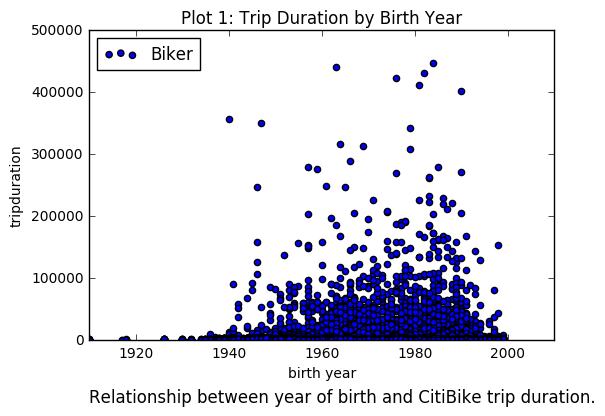

In [26]:
CitiBike.plot(x = 'birth year', y = 'tripduration', kind = 'scatter', label = 'Biker')
plt.axis([1910, 2010, 0, 500000])
plt.title('Plot 1: Trip Duration by Birth Year')
plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.legend(loc = 'upper left')
#citi_bike.plot(x = 'birth year', y = 'tripduration', kind = 'bar')

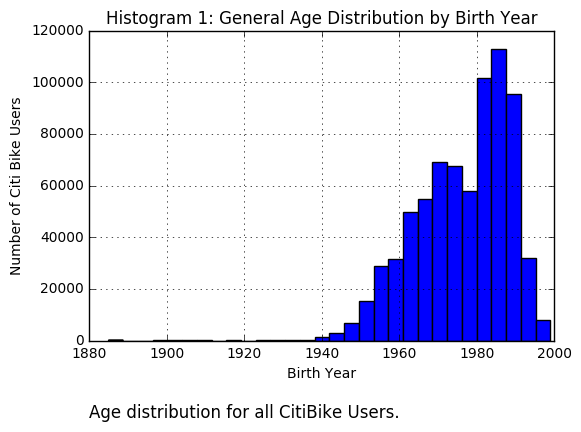

In [29]:
age_hist = CitiBike['birth year'].hist(bins = 30)
age_hist.set_title("Histogram 1: General Age Distribution by Birth Year")
age_hist.set_xlabel("Birth Year")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(1880, -30000, 'Age distribution for all CitiBike Users.', fontsize = 12 )

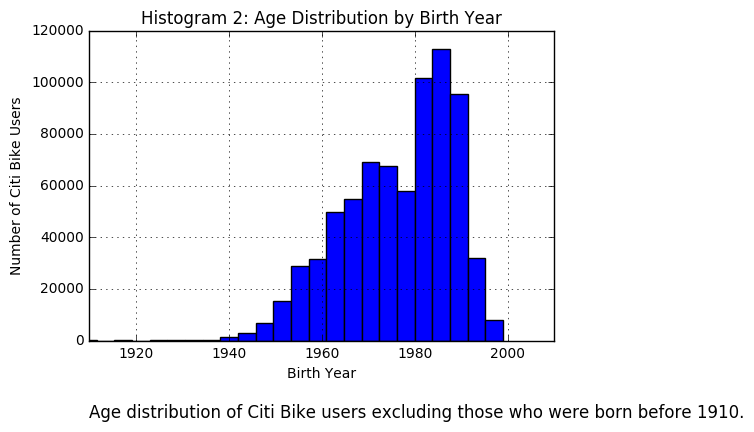

In [30]:
age_hist = CitiBike['birth year'].hist(bins = 30)
plt.axis([1910, 2010, 0, 120000])
age_hist.set_title("Histogram 2: Age Distribution by Birth Year")
age_hist.set_xlabel("Birth Year")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(1910, -30000, 'Age distribution of Citi Bike users excluding those who were born before 1910.', fontsize = 12)

In order to address the fact that it is unlikely anyone born before 1910 is either alive or a current Citi Bike user, we are not taking into account people that were born before 1910. If we do not proceed to exclude these data, we could encounter errors related to the presence of outliers. 

In [31]:
CitiBike35 = CitiBike[CitiBike['birth year'] > 1980]

In [33]:
CitiBike35.head()

,tripduration,birth year
0,475,1983.0
3,1075,1985.0
7,1531,1988.0
8,1617,1986.0
10,721,1982.0


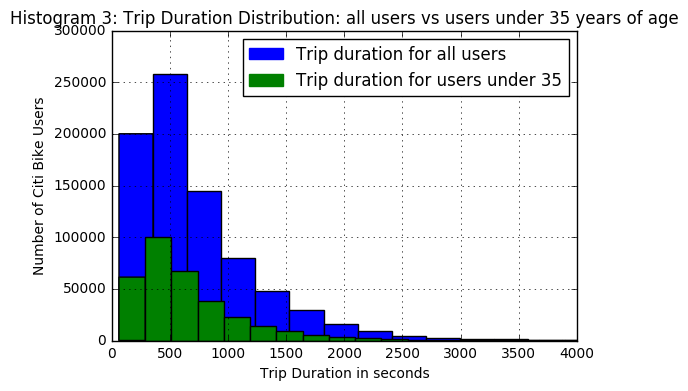

In [61]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

age_hist = CitiBike['tripduration'].hist(bins = 10000)
age_hist = CitiBike35['tripduration'].hist(bins = 10000)
plt.axis([0, 4000, 0, 300000])
age_hist.set_title(    "Histogram 3: Trip Duration Distribution: all users vs users under 35 years of age")
age_hist.set_xlabel("Trip Duration in seconds")
age_hist.set_ylabel("Number of Citi Bike Users")
blue_patch = mpatches.Patch(color='blue', label='Trip duration for all users')
green_patch = mpatches.Patch(color='green', label='Trip duration for users under 35')
plt.legend(handles=[blue_patch, green_patch])

Above, the distributions of trip duration for the entire data set (in blue) and for the group of those 35 and under (in green) are compared. 


Because the objective of our project is to compare the relationship between Citi Bike users’ date of birth and trip duration and specifically, between users under 35 years of age and the average Citi Bike client. We first have to calculate the mean and standard deviation, for both the sample and the population, and then we have to perform a statistical test of preference. 

In [37]:
meanpop = CitiBike.mean()

In [38]:
meanpop

tripduration     945.711619
birth year      1976.278869
dtype: float64

In [39]:
stdpop = CitiBike.std()

In [40]:
stdpop

tripduration    9684.869098
birth year        11.832226
dtype: float64

In [41]:
mean35 = CitiBike35.mean()

In [42]:
mean35

tripduration     753.569816
birth year      1986.786407
dtype: float64

In [43]:
std35 = CitiBike35.std()

In [44]:
std35

tripduration    6957.030268
birth year         3.911396
dtype: float64

Having gathered the information above and, in accordance with our peer reviews’ suggestions, we proceed to perform a z-test to compare data of users under 35 and the total population. 


In [58]:
z_test = ((meanpop) - CitiBike35.mean())/(stdpop/sqrt(len(CitiBike)))

In [59]:
z_test

tripduration     17.790571
birth year     -796.335834
dtype: float64

From our Z-test, we obtained a Z-statistic of 17.79. From the Z-Table, this gave an area of over 0.9998. Thus, our p-value is (1 - 0.9998), or 0.0002, meaning there is a 0.02% probability that the difference observed between the two groups is due to chance alone. Specifically, this p-value is much smaller than our alpha level of 0.05, meaning we can reject our null hypothesis, and can conclude that trip duration times of Citi Bike users are longer for those under age 35 compared the average user. 